In [7]:
import pandas as pd
import numpy as np

## Load the Data

In [ ]:
# raw data
mega = pd.read_csv("raw_data.csv")
print("Loaded raw data with shape:", mega.shape)

Loaded raw data with shape: (125542, 78)


## Drop unrelated columns and rows

In [9]:
#drop agent related columns
cols_to_drop = [
    # agent / brokerage identifiers
    'ListAgentAOR', 'BuyerAgentAOR', 'BuyerAgentMlsId',
    'ListAgentFirstName', 'ListAgentLastName', 'ListAgentFullName',
    'BuyerAgentFirstName', 'BuyerAgentLastName',
    'CoListAgentFirstName', 'CoListAgentLastName', 'CoBuyerAgentFirstName',
    # office / brokerage names
    'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName', 'BuyerOfficeAOR',
    # contact info
    'ListAgentEmail',
    # MLS keys / IDs
    #could we making listingkey the index for uniqueness verification?
    'ListingKey', 'ListingKeyNumeric', 'ListingId',
    # listing-time prices
    'OriginalListPrice', 'ListPrice',
    # temporal status dates
    'CloseDate', 'ContractStatusChangeDate',
    'PurchaseContractDate', 'ListingContractDate', 'MlsStatus', 'DaysOnMarket'
    # other internal MLS fields
    'AssociationFeeFrequency', 'MLSAreaMajor', 'BusinessType'
]

mega_filtered = mega.drop(columns=cols_to_drop, errors='ignore').copy()

print(f"Remaining columns: {mega_filtered.columns}")

Remaining columns: Index(['Flooring', 'ViewYN', 'WaterfrontYN', 'BasementYN', 'PoolPrivateYN',
       'ClosePrice', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'DaysOnMarket', 'FireplacesTotal',
       'AssociationFeeFrequency', 'AboveGradeFinishedArea', 'TaxAnnualAmount',
       'CountyOrParish', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'YearBuilt', 'StreetNumberNumeric',
       'BathroomsTotalInteger', 'City', 'TaxYear', 'BuildingAreaTotal',
       'BedroomsTotal', 'ElementarySchoolDistrict', 'BelowGradeFinishedArea',
       'StateOrProvince', 'CoveredSpaces', 'MiddleOrJuniorSchool',
       'FireplaceYN', 'Stories', 'HighSchool', 'Levels', 'LotSizeDimensions',
       'LotSizeArea', 'MainLevelBedrooms', 'NewConstructionYN', 'GarageSpaces',
       'HighSchoolDistrict', 'PostalCode', 'AssociationFee',
       'LotSizeSquareFeet', 'MiddleOrJuniorSchoolDist

In [10]:
#dropping rows - only observations with PropertyType=“Residential” and PropertySubType=“SingleFamilyResidence”
mega_rc_filtered = mega_filtered.copy()
mega_rc_filtered = mega_rc_filtered[mega_rc_filtered['PropertyType']=='Residential']
mega_rc_filtered = mega_rc_filtered[mega_rc_filtered['PropertySubType']=='SingleFamilyResidence']
mega_rc_filtered

,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,UnparsedAddress,PropertyType,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
3,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,1120000.0,37.330858,-121.849610,1182 Winslow Drive,Residential,...,NaN,6418.0,NaN,False,0.0,Other,95122,NaN,6418.0,NaN
12,NaN,True,NaN,NaN,False,890000.0,34.180411,-118.342020,1377 N Catalina Street,Residential,...,NaN,6473.0,3.0,False,1.0,Burbank Unified,91505,0.0,6473.0,NaN
13,NaN,False,NaN,NaN,False,1138000.0,32.574359,-117.023836,1252 Surfwood Ln,Residential,...,NaN,5219.0,NaN,False,3.0,NaN,92154,51.0,5219.0,NaN
14,Wood,True,NaN,True,False,670000.0,37.116859,-122.113773,12540 Irwin Way,Residential,...,NaN,61649.0,NaN,False,0.0,Other,95006,NaN,61649.0,NaN
15,NaN,True,NaN,NaN,False,681877.0,33.725080,-117.222302,25075 Butte Drive,Residential,...,NaN,7000.0,1.0,True,2.0,Mendocino Unified,92586,0.0,7000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125479,Carpet,False,NaN,NaN,False,510000.0,33.943555,-118.285762,624 W 102nd Street,Residential,...,NaN,4225.0,2.0,False,1.0,Los Angeles Unified,90044,0.0,4225.0,NaN
125505,Laminate,True,NaN,NaN,False,340000.0,33.731745,-116.728918,53455 Middle Ridge Drive,Residential,...,NaN,8712.0,NaN,False,0.0,NaN,92549,NaN,8712.0,NaN
125516,NaN,False,NaN,NaN,False,575000.0,34.264846,-118.426665,10716 Telfair Avenue,Residential,...,NaN,6750.0,3.0,False,2.0,Los Angeles Unified,91331,0.0,6750.0,NaN
125528,Carpet,True,NaN,NaN,True,3630000.0,33.834420,-116.548440,840 N PRESCOTT Drive,Residential,...,125x185,23087.0,NaN,False,3.0,NaN,92262,NaN,23087.0,NaN


## Missingness inspection

In [11]:
#michael missingness table
missing_pct = mega_rc_filtered.isnull().mean().sort_values(ascending=False)
missing_pct

MiddleOrJuniorSchoolDistrict    1.000000
CoveredSpaces                   1.000000
TaxYear                         1.000000
TaxAnnualAmount                 1.000000
AboveGradeFinishedArea          1.000000
FireplacesTotal                 1.000000
ElementarySchoolDistrict        1.000000
WaterfrontYN                    0.999402
BelowGradeFinishedArea          0.993682
BasementYN                      0.975972
BuilderName                     0.951750
LotSizeDimensions               0.937983
BuildingAreaTotal               0.934929
ElementarySchool                0.865430
MiddleOrJuniorSchool            0.865285
HighSchool                      0.823773
AssociationFeeFrequency         0.745758
SubdivisionName                 0.652248
MainLevelBedrooms               0.397505
Flooring                        0.360728
AssociationFee                  0.295737
HighSchoolDistrict              0.264616
Stories                         0.122532
AttachedGarageYN                0.117280
Levels          

In [12]:
#dropping columns that are more than 50% nulls
sparse = missing_pct[missing_pct > 0.5].index.tolist()

# also drop 0.5–0.9
#sparse = missing_prop[(missing_prop > 0.5) & (missing_prop <= 0.9)].index.tolist()

cols_to_drop = sparse #+ sparse
print(cols_to_drop)
#even though many seem logically relevant in pricing not enough data to include them in the model

mega_filtered_dropped = mega_rc_filtered.copy().drop(columns=cols_to_drop, errors='ignore')

missing_pct_fd = mega_filtered_dropped.copy().isnull().mean().sort_values(ascending=False) #new series of missingness percent
mega_fd = mega_filtered_dropped.copy()#copy of clean dataset to work with
mega_fd

['MiddleOrJuniorSchoolDistrict', 'CoveredSpaces', 'TaxYear', 'TaxAnnualAmount', 'AboveGradeFinishedArea', 'FireplacesTotal', 'ElementarySchoolDistrict', 'WaterfrontYN', 'BelowGradeFinishedArea', 'BasementYN', 'BuilderName', 'LotSizeDimensions', 'BuildingAreaTotal', 'ElementarySchool', 'MiddleOrJuniorSchool', 'HighSchool', 'AssociationFeeFrequency', 'SubdivisionName']


,Flooring,ViewYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,UnparsedAddress,PropertyType,LivingArea,DaysOnMarket,...,Stories,Levels,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
3,"Carpet,Laminate,Tile",False,NaN,1120000.0,37.330858,-121.849610,1182 Winslow Drive,Residential,1151.0,79,...,NaN,NaN,6418.0,NaN,False,0.0,Other,95122,NaN,6418.0
12,NaN,True,False,890000.0,34.180411,-118.342020,1377 N Catalina Street,Residential,1434.0,0,...,1.0,One,6473.0,3.0,False,1.0,Burbank Unified,91505,0.0,6473.0
13,NaN,False,False,1138000.0,32.574359,-117.023836,1252 Surfwood Ln,Residential,2872.0,0,...,2.0,Two,5219.0,NaN,False,3.0,NaN,92154,51.0,5219.0
14,Wood,True,False,670000.0,37.116859,-122.113773,12540 Irwin Way,Residential,800.0,0,...,NaN,NaN,61649.0,NaN,False,0.0,Other,95006,NaN,61649.0
15,NaN,True,False,681877.0,33.725080,-117.222302,25075 Butte Drive,Residential,2824.0,0,...,2.0,Two,7000.0,1.0,True,2.0,Mendocino Unified,92586,0.0,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125479,Carpet,False,False,510000.0,33.943555,-118.285762,624 W 102nd Street,Residential,1014.0,288,...,1.0,One,4225.0,2.0,False,1.0,Los Angeles Unified,90044,0.0,4225.0
125505,Laminate,True,False,340000.0,33.731745,-116.728918,53455 Middle Ridge Drive,Residential,648.0,563,...,NaN,NaN,8712.0,NaN,False,0.0,NaN,92549,NaN,8712.0
125516,NaN,False,False,575000.0,34.264846,-118.426665,10716 Telfair Avenue,Residential,944.0,45,...,1.0,One,6750.0,3.0,False,2.0,Los Angeles Unified,91331,0.0,6750.0
125528,Carpet,True,True,3630000.0,33.834420,-116.548440,840 N PRESCOTT Drive,Residential,4867.0,648,...,NaN,NaN,23087.0,NaN,False,3.0,NaN,92262,NaN,23087.0


In [13]:
# categorized based on mising ratio
drop_missing_cols = missing_pct[missing_pct > 0.99].index.tolist()

print(f">99% missing columns ({len(drop_missing_cols)})")
print(drop_missing_cols)
mega_fd = mega_fd.drop(columns=drop_missing_cols, errors='ignore')

def bucket_missing_rate_v2(rate):
    if rate >= 0.8:
        return 'High Missing (>80%)'
    elif rate >= 0.5:
        return 'Upper-Medium Missing (50%-80%)'
    elif rate >= 0.2:
        return 'Lower-Medium Missing (20%-50%)'
    else:
        return 'Low Missing (<20%)'

missing_df = missing_pct.drop(index = drop_missing_cols).reset_index()
missing_df.columns = ['Column', 'MissingRate']
missing_df['Bucket'] = missing_df['MissingRate'].apply(bucket_missing_rate_v2)

bucket_counts = missing_df['Bucket'].value_counts()

print("\nMissing Value Bucket Summary (4 Buckets):")
print(bucket_counts)

for bucket in ['High Missing (>80%)', 'Upper-Medium Missing (50%-80%)',
               'Lower-Medium Missing (20%-50%)', 'Low Missing (<20%)']:
    print(f"\n{bucket} columns:")
    display(missing_df[missing_df['Bucket'] == bucket][['Column', 'MissingRate']])

>99% missing columns (9)
['MiddleOrJuniorSchoolDistrict', 'CoveredSpaces', 'TaxYear', 'TaxAnnualAmount', 'AboveGradeFinishedArea', 'FireplacesTotal', 'ElementarySchoolDistrict', 'WaterfrontYN', 'BelowGradeFinishedArea']

Missing Value Bucket Summary (4 Buckets):
Bucket
Low Missing (<20%)                28
High Missing (>80%)                7
Lower-Medium Missing (20%-50%)     4
Upper-Medium Missing (50%-80%)     2
Name: count, dtype: int64

High Missing (>80%) columns:


,Column,MissingRate
0,BasementYN,0.975972
1,BuilderName,0.951750
2,LotSizeDimensions,0.937983
3,BuildingAreaTotal,0.934929
4,ElementarySchool,0.865430
5,MiddleOrJuniorSchool,0.865285
6,HighSchool,0.823773



Upper-Medium Missing (50%-80%) columns:


,Column,MissingRate
7,AssociationFeeFrequency,0.745758
8,SubdivisionName,0.652248



Lower-Medium Missing (20%-50%) columns:


,Column,MissingRate
9,MainLevelBedrooms,0.397505
10,Flooring,0.360728
11,AssociationFee,0.295737
12,HighSchoolDistrict,0.264616



Low Missing (<20%) columns:


,Column,MissingRate
13,Stories,0.122532
14,AttachedGarageYN,0.117280
15,Levels,0.087807
16,PoolPrivateYN,0.087564
17,ViewYN,0.086983
18,NewConstructionYN,0.072779
19,GarageSpaces,0.037828
20,LotSizeAcres,0.018211
21,LotSizeSquareFeet,0.018146
22,LotSizeArea,0.018114


In [14]:
#investigating duplicates
print(mega_fd.shape[0])
mega_fd['UnparsedAddress'].value_counts()>1

61886


UnparsedAddress
24784 Metric Drive         True
23160 Shiday Court         True
23 Brassie Court           True
6312 Pierce Avenue         True
9659 Tuco Lane             True
                          ...  
13301 Clairepointe Way    False
5639 W Cielo Way          False
22021 Celes Street        False
402 Porter Street         False
3412 Kodiak Drive         False
Name: count, Length: 61475, dtype: bool

In [15]:
#checking for missingness dependencies for better imputation
from scipy.stats import chi2_contingency, fisher_exact, mannwhitneyu

df = mega_fd.copy()

pval_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)

#classify columns by datatype
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

# loop through each column to check for missingness dependency
for target_col in df.columns:
    # Create binary mask: 1 if missing, 0 if not
    is_missing = df[target_col].isna().astype(int)

    for predictor_col in df.columns:
        if target_col == predictor_col:
            pval_matrix.loc[target_col, predictor_col] = np.nan
            continue

        predictor = df[predictor_col]

        # Only look at rows where predictor is not missing
        mask = ~predictor.isna()
        try:
            if predictor_col in categorical_cols:
                # Create contingency table
                contingency = pd.crosstab(is_missing[mask], predictor[mask])

                # If 2x2 table, use Fisher's Exact test (better for small samples)
                if contingency.shape == (2, 2):
                    _, p = fisher_exact(contingency)
                else:
                    # Larger tables → chi-squared test
                    _, p, _, _ = chi2_contingency(contingency)

            elif predictor_col in numerical_cols:
                # Split numerical predictor by missingness of target
                group1 = predictor[(is_missing == 1) & mask]
                group0 = predictor[(is_missing == 0) & mask]

                if len(group1) > 0 and len(group0) > 0:
                    # Use Mann-Whitney U test (non-parametric)
                    _, p = mannwhitneyu(group1, group0, alternative='two-sided')
                else:
                    p = np.nan
            else:
                p = np.nan

        except Exception:
            p = np.nan

        pval_matrix.loc[target_col, predictor_col] = p


pval_matrix

,Flooring,ViewYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,UnparsedAddress,PropertyType,LivingArea,DaysOnMarket,...,Stories,Levels,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
Flooring,NaN,6.105994e-208,1.211578e-18,8.240234e-207,0.000000e+00,0.000000e+00,0.393242,1.0,8.226930e-110,9.089053e-13,...,1.631970e-29,1.126774e-40,1.902270e-01,1.239312e-02,2.535815e-01,2.128197e-21,0.000000e+00,0.000000e+00,1.145913e-166,2.442317e-03
ViewYN,1.092208e-247,NaN,0.000000e+00,1.744115e-10,0.000000e+00,0.000000e+00,0.188112,1.0,7.701074e-28,3.679866e-45,...,3.527195e-04,1.459056e-11,4.263515e-82,5.982534e-01,3.159316e-23,2.044202e-81,0.000000e+00,0.000000e+00,4.766579e-261,4.202513e-137
PoolPrivateYN,0.000000e+00,1.241303e-238,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.212774,1.0,1.724914e-15,1.216971e-51,...,1.222827e-14,2.425699e-117,1.100740e-04,7.642849e-02,1.559763e-56,1.125425e-48,0.000000e+00,0.000000e+00,1.522610e-217,1.271779e-01
ClosePrice,1.000000e+00,1.000000e+00,1.673721e-01,NaN,1.540667e-01,2.776172e-01,1.000000,1.0,1.785777e-01,2.624821e-01,...,4.624619e-01,9.999998e-01,8.611080e-02,8.354996e-02,1.000000e+00,4.799293e-02,8.003955e-241,0.000000e+00,4.656114e-01,8.775033e-02
Latitude,1.000000e+00,1.000000e+00,1.000000e+00,9.730839e-01,NaN,NaN,0.160475,1.0,5.657031e-01,6.175818e-01,...,2.513369e-01,9.999540e-01,2.236917e-01,NaN,9.051632e-03,4.226405e-01,1.911540e-35,1.627981e-57,NaN,1.693466e-01
Longitude,1.000000e+00,1.000000e+00,1.000000e+00,9.730839e-01,NaN,NaN,0.160475,1.0,5.657031e-01,6.175818e-01,...,2.513369e-01,9.999540e-01,2.236917e-01,NaN,9.051632e-03,4.226405e-01,1.911540e-35,1.627981e-57,NaN,1.693466e-01
UnparsedAddress,1.000000e+00,1.000000e+00,1.326418e-02,4.906866e-01,1.468083e-02,1.325488e-01,NaN,1.0,4.447877e-01,2.002644e-03,...,5.181964e-01,1.857652e-01,9.397643e-01,4.074184e-02,1.449281e-09,5.267581e-02,4.323817e-16,5.637784e-28,9.734834e-01,8.445014e-01
PropertyType,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,1.000000e+00,NaN,NaN,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,NaN
LivingArea,1.000000e+00,4.002781e-02,7.692817e-01,4.201955e-13,6.801363e-01,1.910602e-03,0.160475,1.0,NaN,2.167609e-01,...,9.476588e-01,6.652636e-13,2.018141e-02,1.139215e-01,1.626377e-01,4.256849e-01,1.205576e-42,6.779954e-88,8.455064e-01,5.310434e-02
DaysOnMarket,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,1.000000,1.0,NaN,NaN,...,NaN,1.000000e+00,NaN,NaN,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,NaN


In [16]:
numerical_cols = mega_fd.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = mega_fd.select_dtypes(include=['object']).columns.tolist()
numerical_cols

['ClosePrice',
 'Latitude',
 'Longitude',
 'LivingArea',
 'DaysOnMarket',
 'ParkingTotal',
 'LotSizeAcres',
 'YearBuilt',
 'StreetNumberNumeric',
 'BathroomsTotalInteger',
 'BedroomsTotal',
 'Stories',
 'LotSizeArea',
 'MainLevelBedrooms',
 'GarageSpaces',
 'AssociationFee',
 'LotSizeSquareFeet']

In [17]:
#finding significant values
significant = pval_matrix < 0.05
significant

,Flooring,ViewYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,UnparsedAddress,PropertyType,LivingArea,DaysOnMarket,...,Stories,Levels,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
Flooring,False,True,True,True,True,True,False,False,True,True,...,True,True,False,True,False,True,True,True,True,True
ViewYN,True,False,True,True,True,True,False,False,True,True,...,True,True,True,False,True,True,True,True,True,True
PoolPrivateYN,True,True,False,True,True,True,False,False,True,True,...,True,True,True,False,True,True,True,True,True,False
ClosePrice,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
Latitude,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
Longitude,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
UnparsedAddress,False,False,True,False,True,False,False,False,False,True,...,False,False,False,True,True,False,True,True,False,False
PropertyType,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LivingArea,False,True,False,True,False,True,False,False,False,False,...,False,True,True,False,False,False,True,True,False,False
DaysOnMarket,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#missingness in mega_fd
missing_pct_fd


MainLevelBedrooms        0.397505
Flooring                 0.360728
AssociationFee           0.295737
HighSchoolDistrict       0.264616
Stories                  0.122532
AttachedGarageYN         0.117280
Levels                   0.087807
PoolPrivateYN            0.087564
ViewYN                   0.086983
NewConstructionYN        0.072779
GarageSpaces             0.037828
LotSizeAcres             0.018211
LotSizeSquareFeet        0.018146
LotSizeArea              0.018114
StreetNumberNumeric      0.001228
UnparsedAddress          0.001034
YearBuilt                0.000921
City                     0.000921
FireplaceYN              0.000614
LivingArea               0.000582
BathroomsTotalInteger    0.000145
Latitude                 0.000065
Longitude                0.000065
ClosePrice               0.000016
PostalCode               0.000000
PropertySubType          0.000000
PropertyType             0.000000
ParkingTotal             0.000000
StateOrProvince          0.000000
BedroomsTotal 

In [19]:
significant.sum(axis=1).sort_values()

CountyOrParish            0
PropertySubType           0
ParkingTotal              0
BedroomsTotal             0
DaysOnMarket              0
PropertyType              0
StateOrProvince           0
PostalCode                0
BathroomsTotalInteger     1
ClosePrice                4
Longitude                 6
Latitude                  6
UnparsedAddress          10
LivingArea               12
StreetNumberNumeric      13
City                     13
FireplaceYN              14
YearBuilt                16
LotSizeArea              20
GarageSpaces             22
Levels                   22
LotSizeSquareFeet        22
LotSizeAcres             22
NewConstructionYN        23
PoolPrivateYN            24
HighSchoolDistrict       24
ViewYN                   25
AssociationFee           25
Flooring                 25
Stories                  27
AttachedGarageYN         27
MainLevelBedrooms        27
dtype: int64

In [20]:
# check null values in numerical columns
numerical_nulls = mega_fd[numerical_cols].isnull().sum()
with_null = numerical_nulls[numerical_nulls > 0]


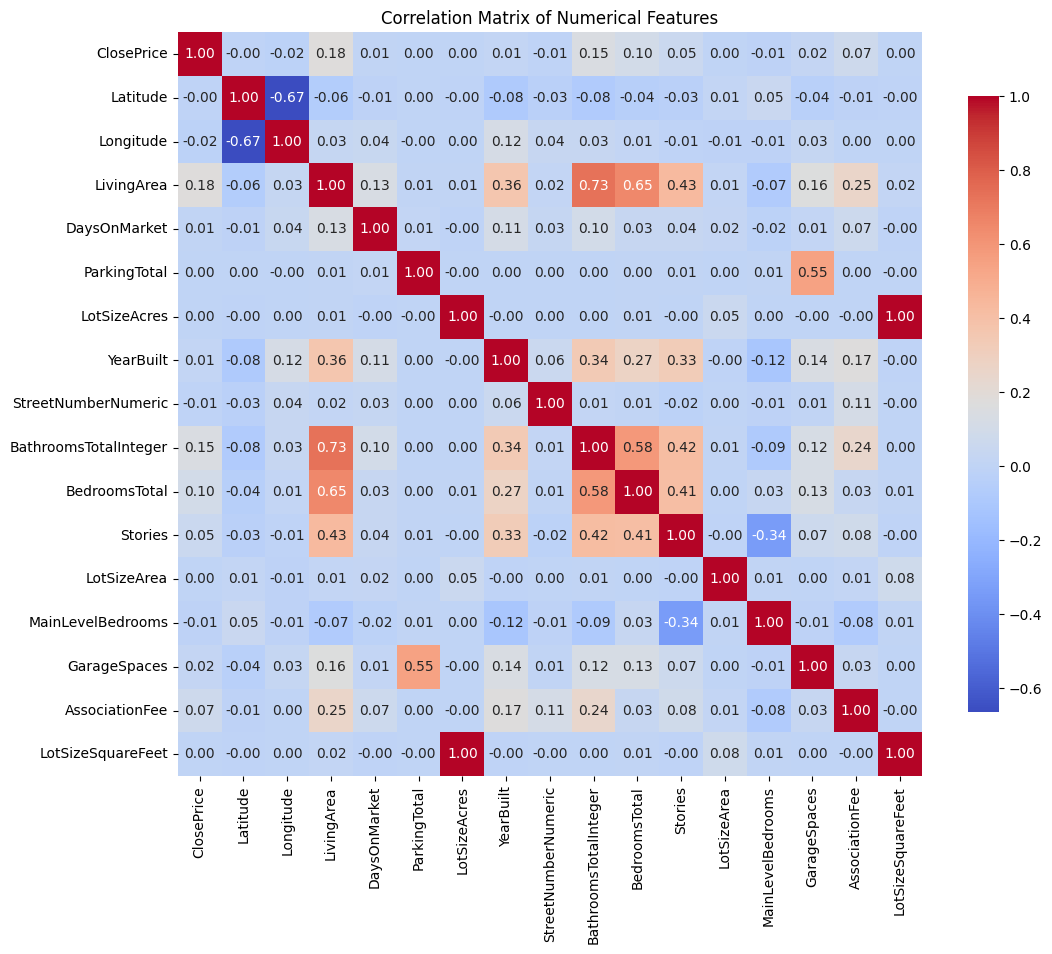

In [21]:
# correlation matrix graph
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
correlation_matrix = mega_fd[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [22]:
mega_fd['GarageSpaces'] = mega_fd['GarageSpaces'].fillna(0)
mega_fd['MainLevelBedrooms'] = mega_fd['MainLevelBedrooms'].fillna(0)


In [23]:
mega_fd.drop(columns=['LotSizeAcres','StreetNumberNumeric'], inplace=True)


# Final Filtered Dataset and Predictive Modeling

This section displays the final cleaned dataset and builds a simple model to predict the close price of a property based on its characteristics.

In [24]:
# Display the final filtered dataset ready for modeling
print('Final dataset shape:', mega_fd.shape)
display(mega_fd.head())
print('Columns:', mega_fd.columns.tolist())

Final dataset shape: (61886, 30)


,Flooring,ViewYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,UnparsedAddress,PropertyType,LivingArea,DaysOnMarket,...,Stories,Levels,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet
3,"Carpet,Laminate,Tile",False,NaN,1120000.0,37.330858,-121.849610,1182 Winslow Drive,Residential,1151.0,79,...,NaN,NaN,6418.0,0.0,False,0.0,Other,95122,NaN,6418.0
12,NaN,True,False,890000.0,34.180411,-118.342020,1377 N Catalina Street,Residential,1434.0,0,...,1.0,One,6473.0,3.0,False,1.0,Burbank Unified,91505,0.0,6473.0
13,NaN,False,False,1138000.0,32.574359,-117.023836,1252 Surfwood Ln,Residential,2872.0,0,...,2.0,Two,5219.0,0.0,False,3.0,NaN,92154,51.0,5219.0
14,Wood,True,False,670000.0,37.116859,-122.113773,12540 Irwin Way,Residential,800.0,0,...,NaN,NaN,61649.0,0.0,False,0.0,Other,95006,NaN,61649.0
15,NaN,True,False,681877.0,33.725080,-117.222302,25075 Butte Drive,Residential,2824.0,0,...,2.0,Two,7000.0,1.0,True,2.0,Mendocino Unified,92586,0.0,7000.0


Columns: ['Flooring', 'ViewYN', 'PoolPrivateYN', 'ClosePrice', 'Latitude', 'Longitude', 'UnparsedAddress', 'PropertyType', 'LivingArea', 'DaysOnMarket', 'CountyOrParish', 'AttachedGarageYN', 'ParkingTotal', 'PropertySubType', 'YearBuilt', 'BathroomsTotalInteger', 'City', 'BedroomsTotal', 'StateOrProvince', 'FireplaceYN', 'Stories', 'Levels', 'LotSizeArea', 'MainLevelBedrooms', 'NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict', 'PostalCode', 'AssociationFee', 'LotSizeSquareFeet']


In [25]:
# drop rows with missing values 
mega_fd = mega_fd.dropna()

In [26]:
mega_fd.shape

(19113, 30)

## Save for modeling

In [27]:
mega_fd.to_csv("cleaned_data.csv", index=False)
print("Saved cleaned dataset to cleaned_data.csv")

Saved cleaned dataset to cleaned_data.csv
